In [13]:
#Import Libraries

import pandas as pd
import seaborn as sns
import os as os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r'/Users/sahinbasol/Documents/Business g/Python/movies.csv')



In [14]:
# let's look at the data 
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [15]:
# let's see if there is any missing data , any row-column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))



name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [44]:
# Data Types for columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [20]:
non_finite_values = df[~np.isfinite(df['budget'])]
non_finite_values

name     rating   genre  year  \
16                Fame          R   Drama  1980   
19          Stir Crazy          R  Comedy  1980   
24        Urban Cowboy         PG   Drama  1980   
25      Altered States          R  Horror  1980   
26     Little Darlings          R  Comedy  1980   
...                ...        ...     ...   ...   
7657              Leap        NaN   Drama  2020   
7659         I Am Fear  Not Rated  Horror  2020   
7660  Aloha Surf Hotel        NaN  Comedy  2020   
7664       Dream Round        NaN  Comedy  2020   
7667         Tee em el        NaN  Horror  2020   

                                released  score    votes            director  \
16          May 16, 1980 (United States)    6.6  21000.0         Alan Parker   
19     December 12, 1980 (United States)    6.8  26000.0      Sidney Poitier   
24          June 6, 1980 (United States)    6.4  14000.0       James Bridges   
25     December 25, 1980 (United States)    6.9  33000.0         Ken Russell   
26        March 21, 1980 (United States)    6.5   5100.0         Ron Maxwell   
...                                  ...    ...      ...                 ...   
7657  September 25, 2020 (United States)    6.7    903.0   Peter Ho-Sun Chan   
7659       March 3, 2020 (United States)    3.4    447.0       Kevin Shulman   
7660    November 5, 2020 (United States)    7.1     14.0  Stefan C. Schaefer   
7664    February 7, 2020 (United States)    4.7     36.0        Dusty Dukatz   
7667     August 19, 2020 (United States)    5.7      7.0        Pereko Mosia   

                  writer              star        country  budget  \
16      Christopher Gore       Eddie Barth  United States     NaN   
19    Bruce Jay Friedman       Gene Wilder  United States     NaN   
24          Aaron Latham     John Travolta  United States     NaN   
25       Paddy Chayefsky      William Hurt  United States     NaN   
26             Kimi Peck      Tatum O'Neal  United States     NaN   
...                  ...               ...            ...     ...   
7657            Ji Zhang           Gong Li          China     NaN   
7659       Kevin Shulman    Kristina Klebe  United States     NaN   
7660  Stefan C. Schaefer       Augie Tulba  United States     NaN   
7664         Lisa Huston  Michael Saquella  United States     NaN   
7667        Pereko Mosia  Siyabonga Mabaso   South Africa     NaN   

            gross                                  company  runtime  
16     21202829.0                Metro-Goldwyn-Mayer (MGM)    134.0  
19    101300000.0                        Columbia Pictures    111.0  
24     46918287.0                       Paramount Pictures    132.0  
25     19853892.0                             Warner Bros.    102.0  
26     34326249.0  Stephen Friedman/Kings Road Productions     96.0  
...           ...                                      ...      ...  
7657   25818882.0                                      NaN    135.0  
7659      13266.0                            Roxwell Films     87.0  
7660          NaN                      Abominable Pictures     90.0  
7664          NaN                Cactus Blue Entertainment     90.0  
7667          NaN                              PK 65 Films    102.0  

[2171 rows x 15 columns]

In [22]:
df = df.dropna(subset=['budget'])
df['budget'] = df['budget'].astype('int64')
df

In [25]:
non_finite_values = df[~np.isfinite(df['budget'])]
non_finite_values

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []

In [29]:
non_finite_values2 = df[~np.isfinite(df['gross'])]
non_finite_values2

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []

In [32]:
df = df.dropna(subset=['gross'])
df['gross'] = df['gross'].astype('int64')
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5436 rows x 15 columns]

In [46]:
# order by gross revenue

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
2417                                    Madadayo        NaN   Drama  1993   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes          director  \
5445  December 18, 2009 (United States)    7.8  1100000.0     James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0     Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0     James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0       J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0     Anthony Russo   
...                                 ...    ...        ...               ...   
2434         June 4, 1994 (South Korea)    4.5     1900.0  Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000.0      John Fawcett   
272      March 12, 1982 (United States)    3.9     2300.0      Charles Band   
2417             April 17, 1993 (Japan)    7.3     5100.0    Akira Kurosawa   
3203           October 1, 1997 (Brazil)    5.7     5800.0      George Huang   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
...                  ...                ...            ...        ...   
2434  Wallace C. Bennett       Brad Johnson  United States    5000000   
3681        Karen Walton      Emily Perkins         Canada    5000000   
272        Alan J. Adler    Robert Glaudini  United States     800000   
2417        Ishirô Honda   Tatsuo Matsumura          Japan   11900000   
3203           Andy Burg       Will Friedle  United States   15000000   

           gross                         company  runtime  
5445  2847246203           Twentieth Century Fox    162.0  
7445  2797501328                  Marvel Studios    181.0  
3045  2201647264           Twentieth Century Fox    194.0  
6663  2069521700                       Lucasfilm    138.0  
7244  2048359754                  Marvel Studios    149.0  
...          ...                             ...      ...  
2434        2970                Trimark Pictures     97.0  
3681        2554       Copperheart Entertainment    108.0  
272         2270                Embassy Pictures     85.0  
2417         596  DENTSU Music And Entertainment    134.0  
3203         309                        Daybreak     85.0  

[5436 rows x 15 columns]

In [47]:
#get all the data displayed
pd.set_option('display.max_rows', None)

In [49]:
#drop any duplicates
#df.drop_duplicates()
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [50]:
df['company'].sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
352                                      Zoetrope Studios
520                                      Zoetrope Studios
146                                      Zoetrope Studios
332                                      Zoetrope Studios
724                                      Zoetrope Studios
2213                                   Zeta Entertainment
5885                              Zentropa Entertainments
4297                              Zentropa Entertainments
4829                              Zentropa Entertainments
3698                              Zentropa Entertainments
5471          

In [51]:
# check the budget high correlation and
# company high correlation



<function matplotlib.pyplot.show(close=None, block=None)>

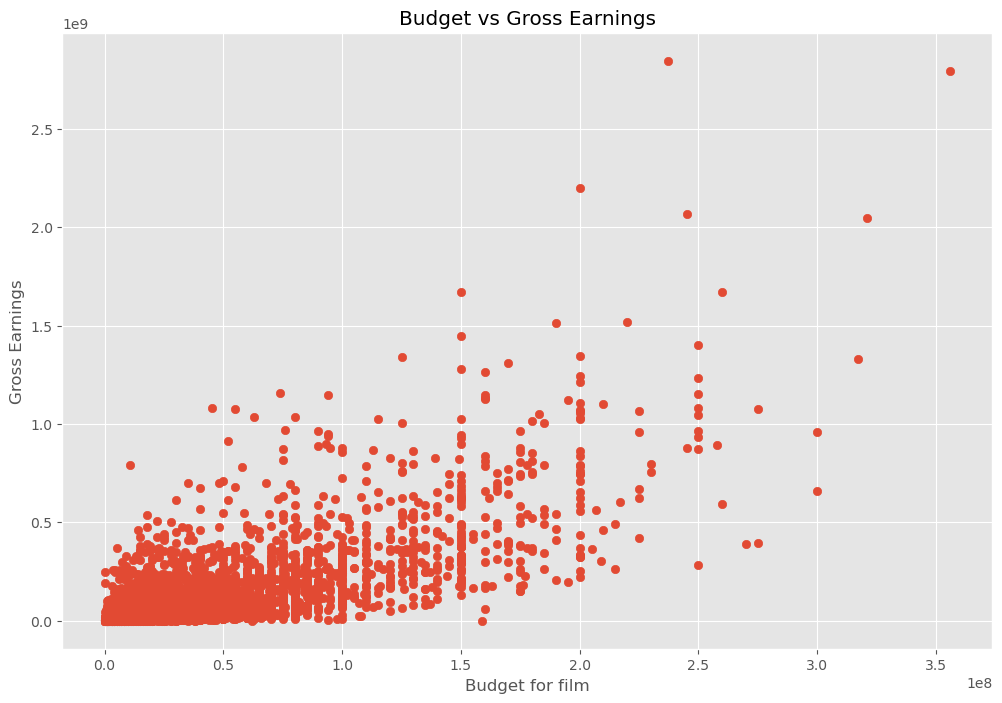

In [54]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')


plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show

In [53]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
5445  2847246203  Twentieth Century Fox    162.0  
7445  2797501328         Marvel Studios    181.0  
3045  2201647264  Twentieth Century Fox    194.0  
6663  2069521700              Lucasfilm    138.0  
7244  2048359754         Marvel Studios    149.0

<Axes: xlabel='budget', ylabel='gross'>

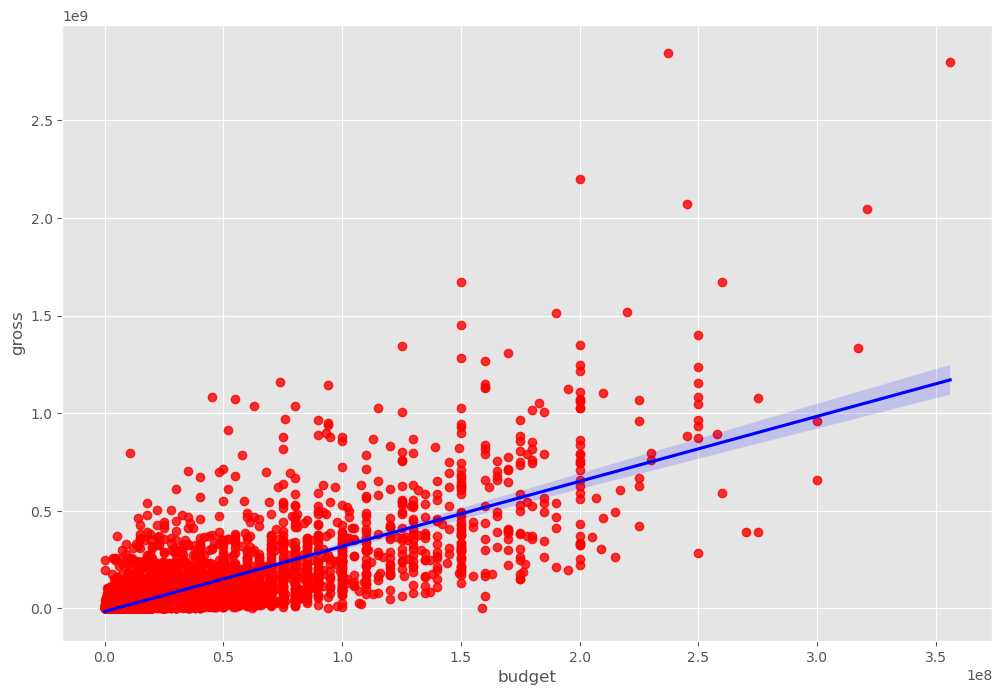

In [56]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [57]:
# let's start looking at correlation

In [61]:
#correlation between only numeric values

numeric_df = df.select_dtypes(include=['int', 'float'])

correlation_matrix = numeric_df.corr(method = 'pearson') #could be kendall or spearman

correlation_matrix

year     score     votes    budget     gross   runtime
year     1.000000  0.055174  0.205758  0.327781  0.274264  0.074203
score    0.055174  1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.205758  0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.327781  0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.274264  0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000

In [62]:
# High correlation between budget and gross

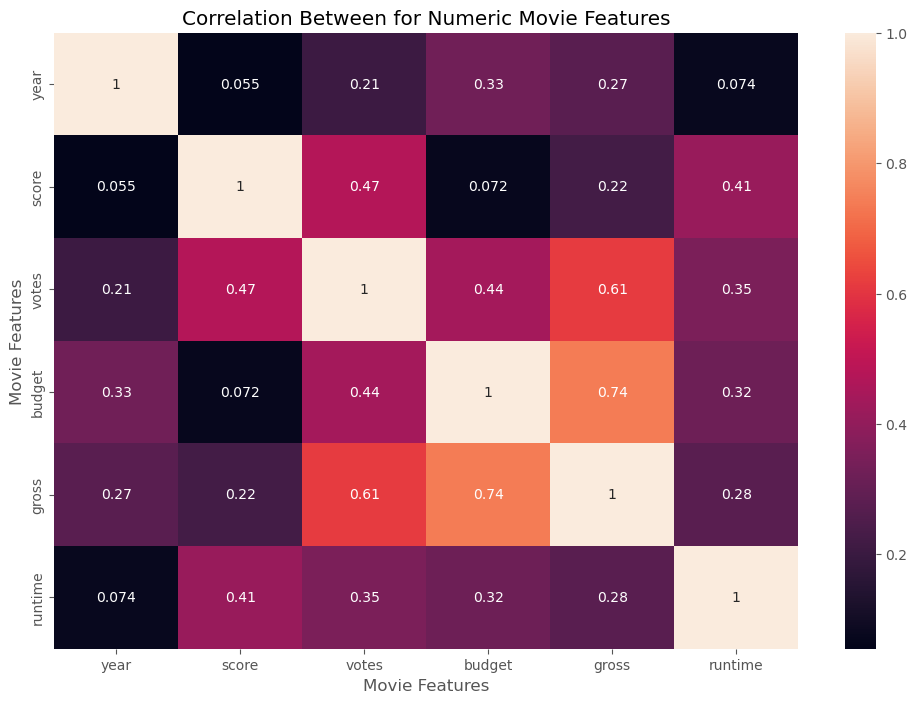

In [64]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Between for Numeric Movie Features')


plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [65]:
# Looks at Company Correlation
# Convert to a numeric representation

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
5445  2847246203  Twentieth Century Fox    162.0  
7445  2797501328         Marvel Studios    181.0  
3045  2201647264  Twentieth Century Fox    194.0  
6663  2069521700              Lucasfilm    138.0  
7244  2048359754         Marvel Studios    149.0

In [67]:
# numerize the company and other non numeric data

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category') #change datatype to category
        df_numerized[col_name] = df_numerized[col_name].cat.codes #gives the actual random numbers
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
5445   387       5      0  2009       528    7.8  1100000.0       787    1265   
7445   389       5      0  2019       138    8.4   903000.0       106     515   
3045  4923       5      6  1997       535    7.8  1100000.0       787    1265   
6663  3656       5      0  2015       530    7.8   876000.0       770    1810   
7244   390       5      0  2018       146    8.4   897000.0       106     515   
7480  4402       4      2  2019      1130    6.9   222000.0      1014    1364   
6653  2125       5      0  2015      1307    7.0   593000.0       337    2530   
6043  3891       5      0  2012      1905    8.0  1300000.0      1062    1650   
6646  1545       5      0  2015       166    7.1   370000.0       811     483   
7494  1534       4      2  2019      2059    6.8   148000.0       279    1386   
6644   388       5      0  2015      1717    7.3   777000.0      1062    1650   
7247   568       5      0  2018       725    7.3   661000.0      1721    2694   
5845  1736       5      1  2011      1096    8.1   790000.0       454    2871   
7075  3657       5      0  2017       501    7.0   581000.0      1592    2494   
7271  2126       5      0  2018      1388    6.2   277000.0       766     779   
6262  1533       4      2  2013      2088    7.4   585000.0       279    1386   
7072   478       4      7  2017      1566    7.1   283000.0       156    2831   
7281  1973       4      2  2018      1329    7.6   263000.0       194     328   
7055  4133       5      0  2017        45    6.6   214000.0       569    1015   
6244  2021       5      0  2013      1886    7.1   779000.0      1772     839   
6688  2554       4      2  2015      1054    6.4   218000.0      1146     363   
6846   752       5      0  2016      1916    7.8   694000.0       106     515   
7250   344       5      0  2018       566    6.9   404000.0       811     701   
4245  4421       5      0  2003       517    8.9  1700000.0      1523    1240   
7458  3608       5      0  2019      1140    7.5   359000.0      1021     481   
7456   757       5      0  2019      1702    6.8   478000.0        97     182   
5878  4964       5      0  2011      1446    6.2   390000.0      1305     888   
6059  3511       5      0  2012      2154    7.7   642000.0      1737    2227   
6494  4963       5      0  2014      1428    5.6   302000.0      1305     888   
2448  4402       1      2  1994      1398    8.5   970000.0      1690    1208   
6047  4062       5      0  2012      1148    8.4  1600000.0       319    1610   
7463  3653       5      0  2019       554    6.5   394000.0       770     491   
7450  2099       6      5  2019      2327    8.4  1000000.0      1943    3008   
7488  4950       1      2  2019      1376    7.7   217000.0      1054    1528   
5685  4949       1      2  2010      1349    8.2   776000.0      1164    1528   
4852  2997       5      0  2006      1259    7.3   668000.0       676    2937   
6869  3273       5      0  2016       510    7.8   572000.0       617     494   
7481   207       4      1  2019      1842    6.9   239000.0       707    1471   
5860  3000       5      0  2011      1808    6.6   492000.0      1640    2937   
7140  1105       4      2  2017      1468    6.3   119000.0      1146     526   
2245  2123       5      0  1993      1296    8.1   894000.0      1864    2075   
6908  1415       4      2  2016      1343    7.3   250000.0        82     153   
3451  3650       4      0  1999      1783    6.5   748000.0       655    1048   
5667   216       4      1  2010      1684    6.4   392000.0      1924    1853   
6863  5344       4      2  2016      1678    8.0   450000.0       241     391   
6045  4254       5      1  2012       493    7.8   773000.0      1523     969   
3843  1741       4      1  2001      1993    7.6   685000.0       282    1238   
5243  4061       5      0  2008      1120    9.0  2400000.0       319    1610   
6311  1104       4      2  2013      

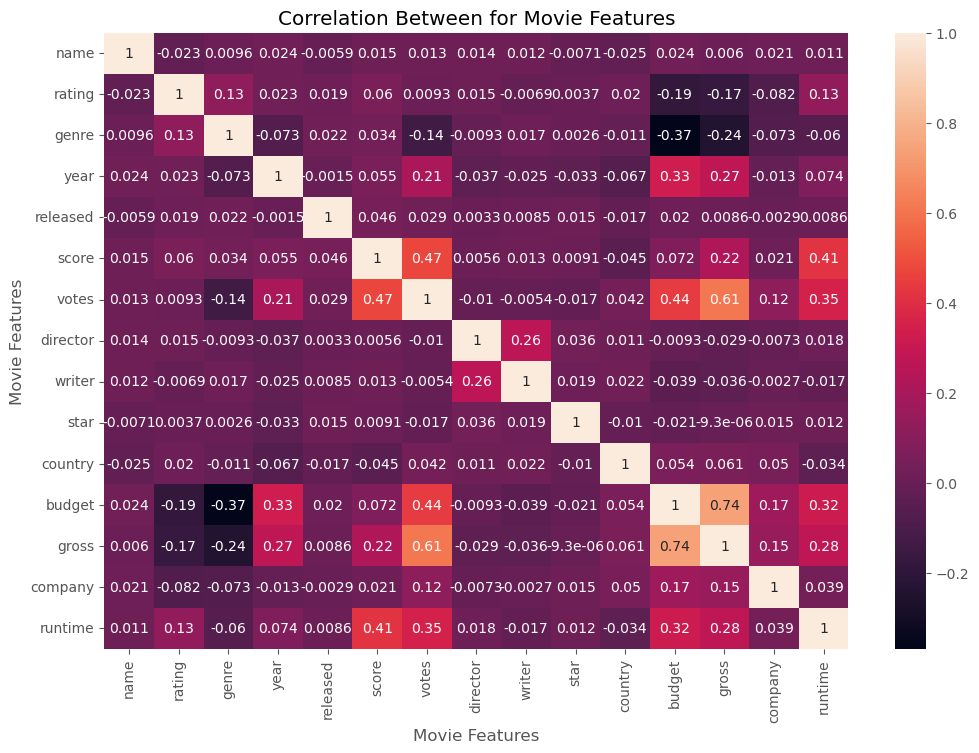

In [70]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Between for Movie Features')


plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [72]:
#organize the matrix


correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.023013
          genre       0.009617
          year        0.024435
          released   -0.005896
          score       0.014955
          votes       0.012915
          director    0.013699
          writer      0.011602
          star       -0.007109
          country    -0.024555
          budget      0.023698
          gross       0.005966
          company     0.021209
          runtime     0.010800
rating    name       -0.023013
          rating      1.000000
          genre       0.128102
          year        0.022668
          released    0.018836
          score       0.059550
          votes       0.009255
          director    0.014847
          writer     -0.006923
          star        0.003737
          country     0.020148
          budget     -0.186892
          gross      -0.168814
          company    -0.082189
          runtime     0.133239
genre     name        0.009617
          rating      0.128102
        

In [73]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre     budget     -0.368900
budget    genre      -0.368900
genre     gross      -0.244380
gross     genre      -0.244380
rating    budget     -0.186892
budget    rating     -0.186892
rating    gross      -0.168814
gross     rating     -0.168814
votes     genre      -0.136457
genre     votes      -0.136457
rating    company    -0.082189
company   rating     -0.082189
genre     company    -0.073293
company   genre      -0.073293
genre     year       -0.073026
year      genre      -0.073026
country   year       -0.066662
year      country    -0.066662
genre     runtime    -0.060186
runtime   genre      -0.060186
country   score      -0.044690
score     country    -0.044690
writer    budget     -0.039420
budget    writer     -0.039420
year      director   -0.036936
director  year       -0.036936
writer    gross      -0.035999
gross     writer     -0.035999
runtime   country    -0.033554
country   runtime    -0.033554
year      star       -0.032770
star      year       -0.032770
gross   

In [77]:
high_corr = sorted_pairs[((sorted_pairs) > 0.5) & ((sorted_pairs) < 0.99) ]
high_corr

gross   votes     0.614904
votes   gross     0.614904
budget  gross     0.740395
gross   budget    0.740395
dtype: float64

In [79]:
unique_high_corr = np.unique(high_corr)
unique_high_corr

array([0.61490448, 0.74039489])